<a href="https://colab.research.google.com/github/SebastianRodriguez05/SyS/blob/main/Parcial_1_SyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 1: Señales y Sistemas 2024-2

### Pregunata 1
Cuál es la señal obtenida en tiempo discreto al utilizar un conversor análogo digital de 5 bits con frecuencia de muestreo de $5kHz$, entrada análoga de -3.3 a 3.3 [v], aplicado a la señal continua $x(t) = 0.3 \cos(1000\pi t-\pi/4) +
0.6 \sin(2000\pi t) + 0.1 \cos(11000\pi t-\pi)$?. Realizar la simulación del proceso de digitalización incluyendo al menos 3 ciclos de la señal $x(t)$.

En caso de que la digitalización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada. El convesor debe permitir configurar la cantidad de bits, rango de la entrada análoga y la frecuencia de muestreo, indicándole al usuario si dicha frecuencia es apropiada o no, y graficar la señal continua, discreta y digital.



##Culculos y Demostracione

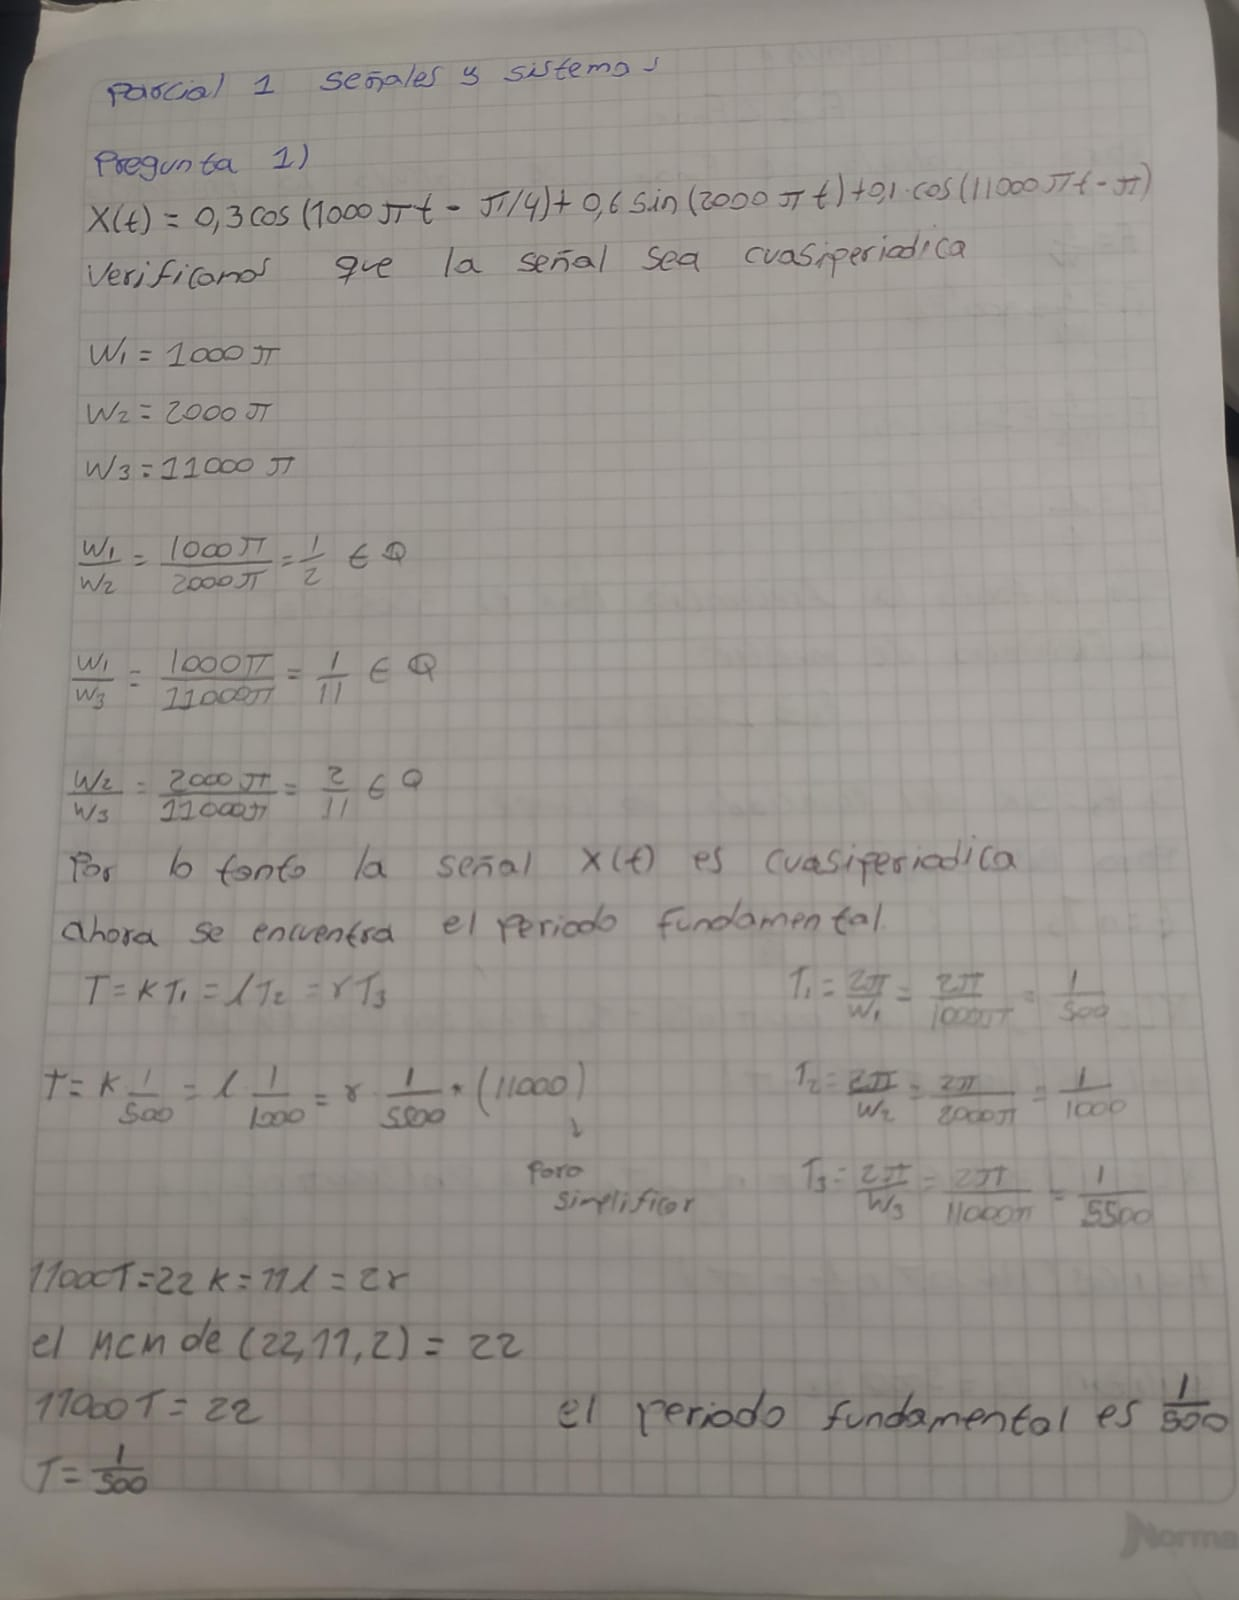

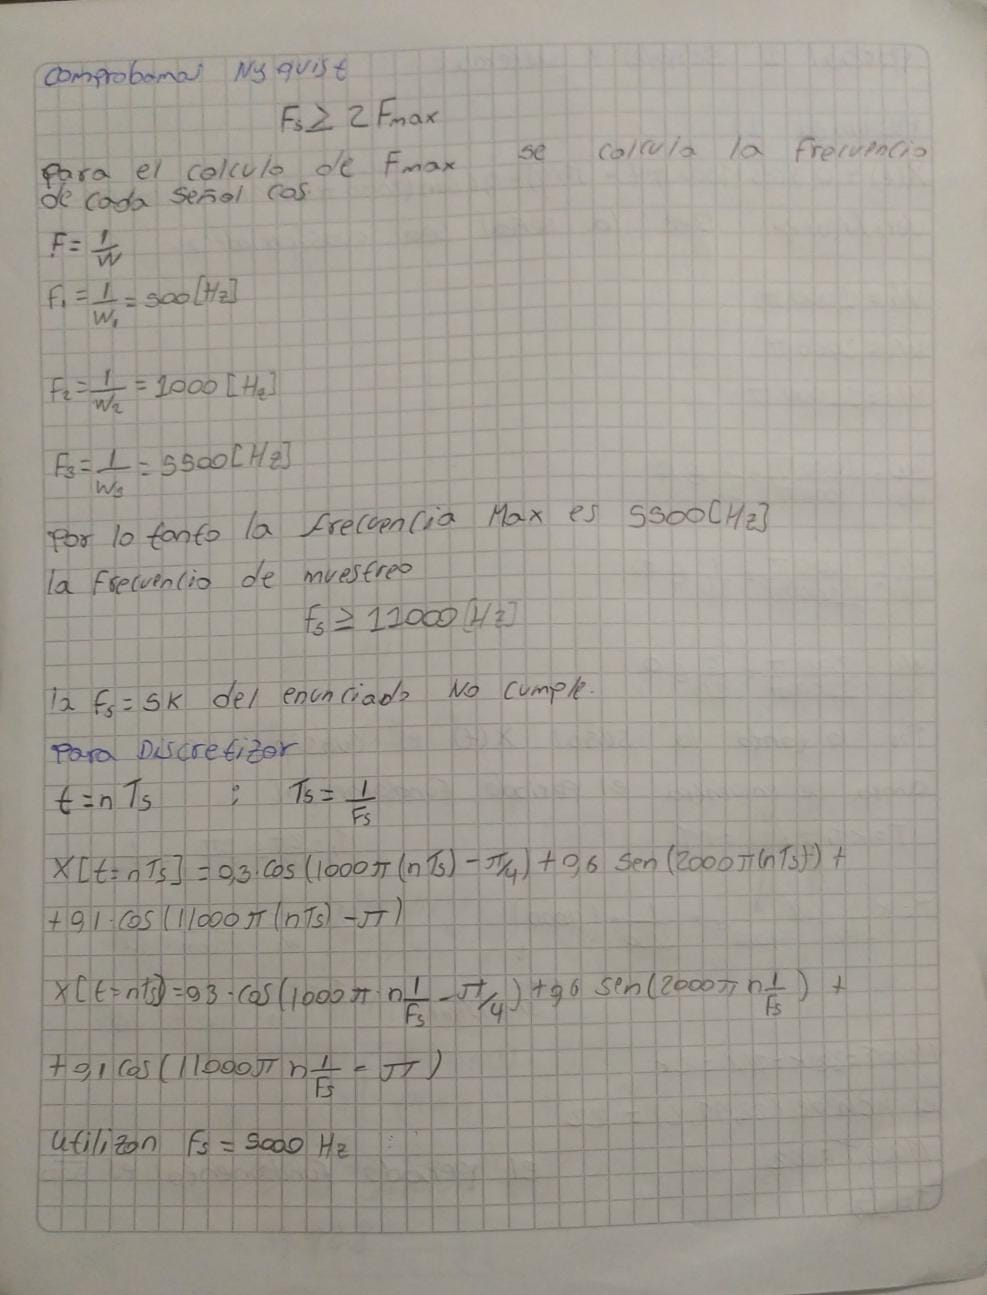

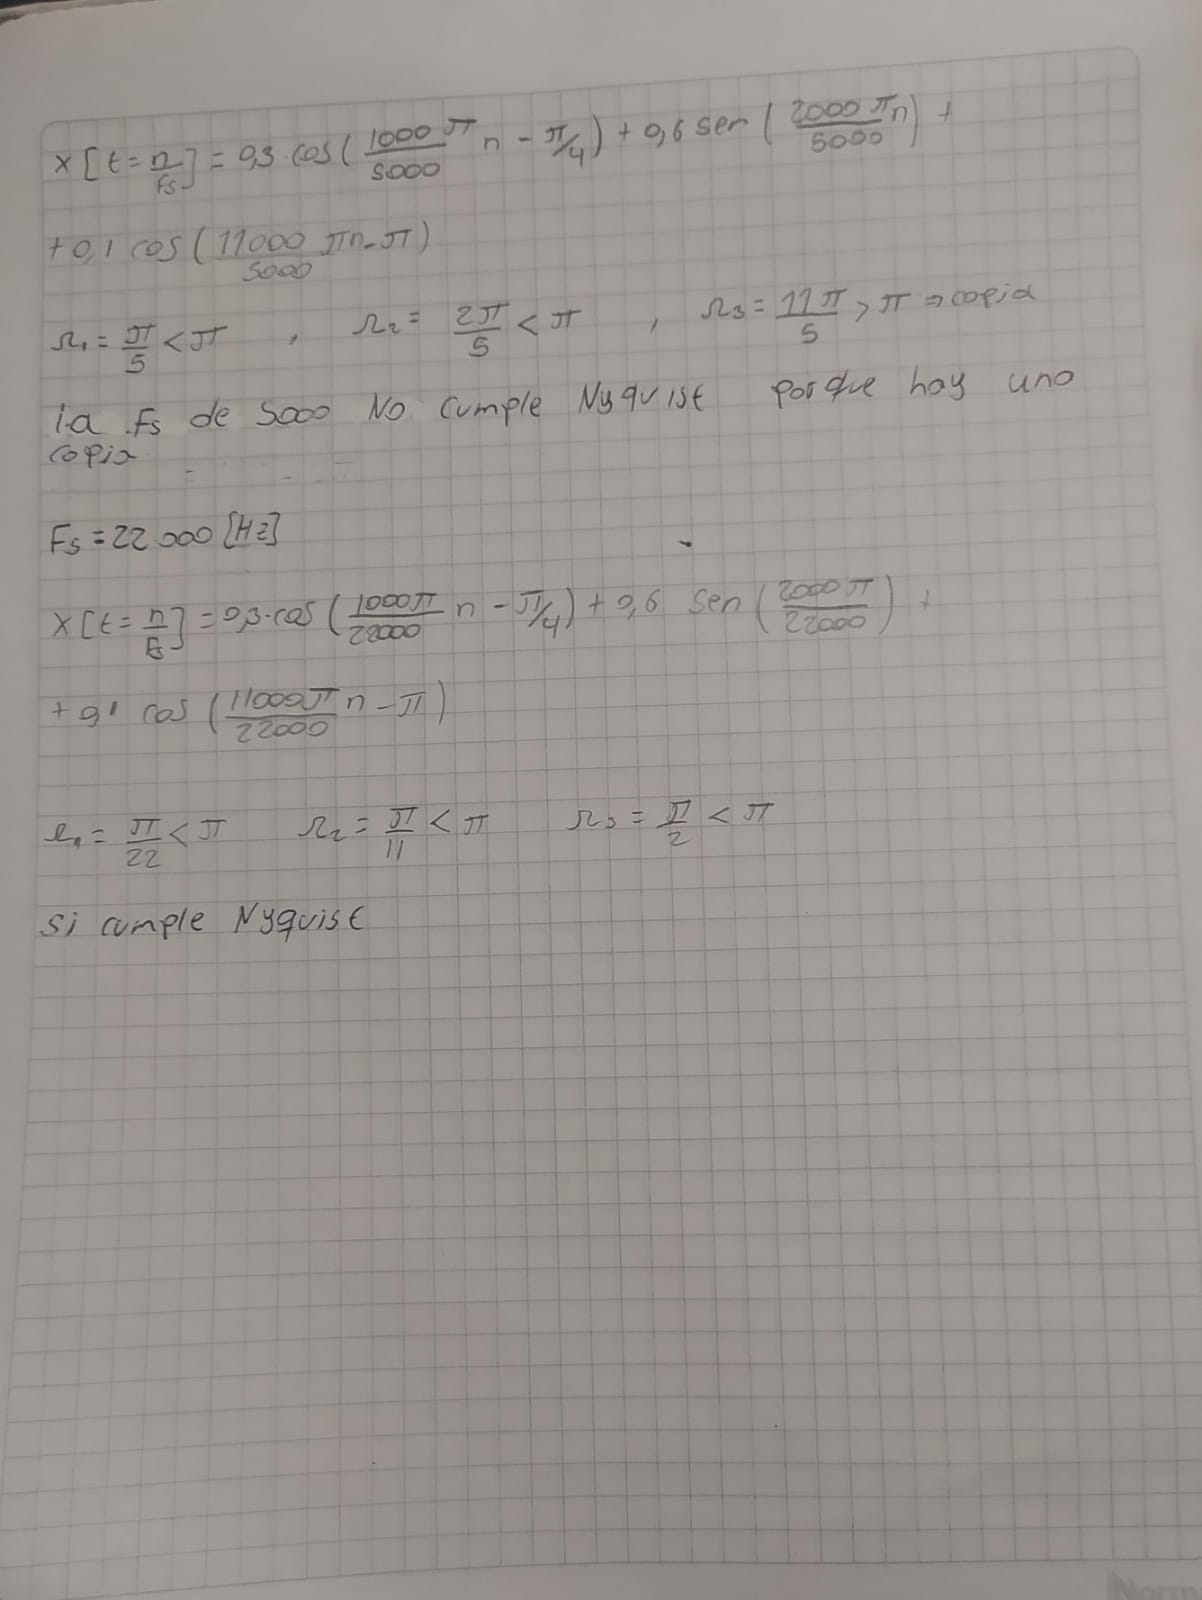

## simulación del proceso

###Primera parte cuanod la frecuencia es de 5000[Hz] que es la dada por el enunciado

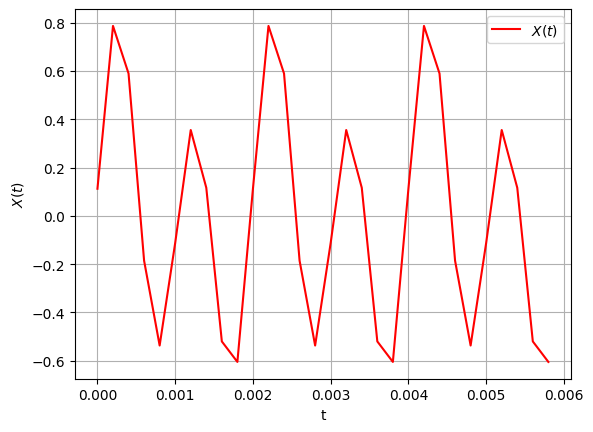

array([0.    , 0.0002, 0.0004, 0.0006, 0.0008, 0.001 , 0.0012, 0.0014,
       0.0016, 0.0018, 0.002 , 0.0022, 0.0024, 0.0026, 0.0028, 0.003 ,
       0.0032, 0.0034, 0.0036, 0.0038, 0.004 , 0.0042, 0.0044, 0.0046,
       0.0048, 0.005 , 0.0052, 0.0054, 0.0056, 0.0058])

In [3]:
from numpy import sin, pi, cos
import numpy as np
import matplotlib.pyplot as plt

A1 = 0.3 # Amplitud de la señal cos1
A2 = 0.6 # Amplitud de la señal sin
A3 = 0.1 # Amplitud de la señal cos2
w1 = 1000*np.pi# Frecuencia de la señal cos1
w2 = 2000*np.pi# Frecuencia de la señal sin
w3 = 11000*np.pi# Frecuencia de la señal cos2
T1 = 2*np.pi/w1 # Periodo de la señal cos1
T2 = 2*np.pi/w2 # Periodo de la señal sin
T3 = 2*np.pi/w3 # Periodo de la señal cos2
F1 = 1/T1 # Frecuencia de la señal cos1
F2 = 1/T2 # Frecuencia de la señal sin
F3 = 1/T3 # Frecuencia de la señal cos2

# definir frecuencia de muuetreo segun nyquist
Fs =  5000 # Frecuaencia mayor a 11000 para cumplir nyquist
# periodo seña cuasiperiodica segun los calculos
T = 1/500
# definir el vector de tiempo
ti = 0 # tiempo inicial
tf = 3*T # tiempo final
tv = np.arange(ti,tf,1/Fs)

#construir la señal
x = A1*np.cos(w1*tv - np.pi/4) +  A2*np.sin(w2*tv) +  0.1*np.cos(w3*tv - np.pi)


plt.plot(tv,x,'r',label='$X(t)$')  #funcion para poder dibujar la señal  x

plt.grid(True) # dibuja las cudriculas detras de la señla
plt.legend()
plt.xlabel('t')
plt.ylabel('$X(t)$')
plt.show()

Text(0, 0.5, '$X(t)$')

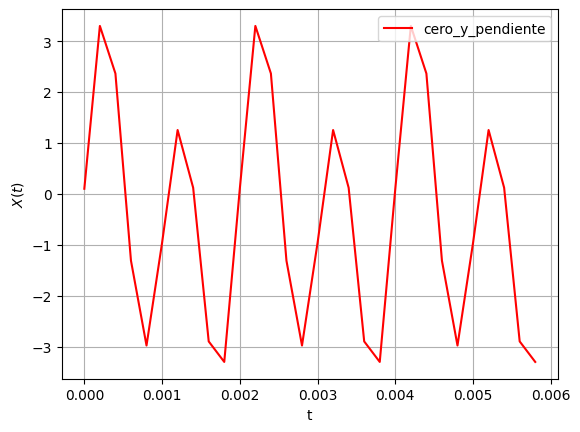

In [4]:
def my_ceropen(x,ymin , ymax ): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv
ymin = -3.3
ymax = 3.3
xcp = my_ceropen(x,ymin=ymin,ymax=ymax)
plt.plot(tv,xcp, 'r', label='cero_y_pendiente')
plt.grid(True)
plt.legend()
plt.xlabel('t')
plt.ylabel('$X(t)$')

In [5]:
nbits = 5
num_est = 2**nbits
ve = np.linspace(ymin,ymax,num_est)
ve

array([-3.3       , -3.08709677, -2.87419355, -2.66129032, -2.4483871 ,
       -2.23548387, -2.02258065, -1.80967742, -1.59677419, -1.38387097,
       -1.17096774, -0.95806452, -0.74516129, -0.53225806, -0.31935484,
       -0.10645161,  0.10645161,  0.31935484,  0.53225806,  0.74516129,
        0.95806452,  1.17096774,  1.38387097,  1.59677419,  1.80967742,
        2.02258065,  2.23548387,  2.4483871 ,  2.66129032,  2.87419355,
        3.08709677,  3.3       ])

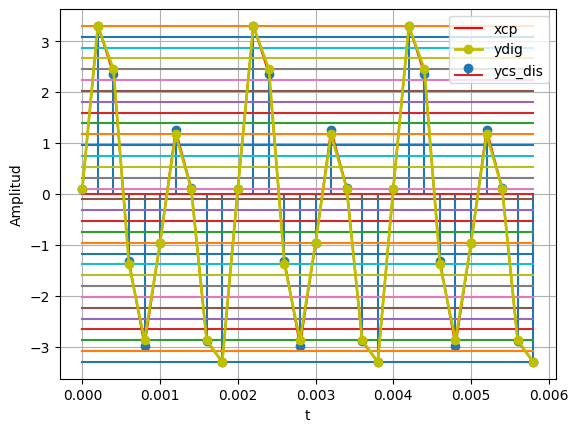

In [6]:
from scipy.spatial.distance import cdist
def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]
#recorrer vector cero y spam discretizado para cuantizar

for i in range(xcp.shape[0]):
   if i==0: #primera muestra
    yq = my_cuantizador(xcp[i],ve)
   else:
    yq = np.append(yq,my_cuantizador(xcp[i],ve)) #apilar datos cuantizando si i>0

#graficar señales

plt.plot(tv,xcp,c='r', label='xcp')#cs continua

plt.stem(tv,xcp, label='ycs_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

En esta caso no se tomo la frecuancia de muestreo de 5000[Hz] porque no cumplia con nyquist, que como vimos en la demostracin para que cumpa nyquist Fs > 11000, por esto en este caso se la va a pedir que ingrese la frecuencia de muestreo y exixte una condicion para que no se pueda igresar una frecuencia menor a 11000.

Ingrese la frecuencia de muestreo mayor o igul a 11000: 22000


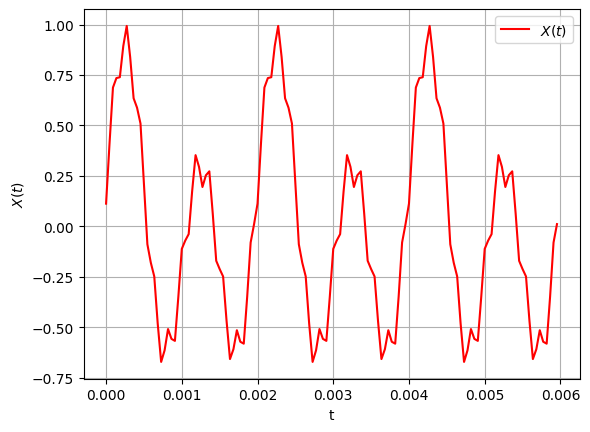

In [7]:
from numpy import sin, pi, cos
import numpy as np
import matplotlib.pyplot as plt

A1 = 0.3 # Amplitud de la señal cos1
A2 = 0.6 # Amplitud de la señal sin
A3 = 0.1 # Amplitud de la señal cos2
w1 = 1000*np.pi# Frecuencia de la señal cos1
w2 = 2000*np.pi# Frecuencia de la señal sin
w3 = 11000*np.pi# Frecuencia de la señal cos2
T1 = 2*np.pi/w1 # Periodo de la señal cos1
T2 = 2*np.pi/w2 # Periodo de la señal sin
T3 = 2*np.pi/w3 # Periodo de la señal cos2
F1 = 1/T1 # Frecuencia de la señal cos1
F2 = 1/T2 # Frecuencia de la señal sin
F3 = 1/T3 # Frecuencia de la señal cos2

# periodo seña cuasiperiodica segun los calculos
T = 1/500
# definir el vector de tiempo
ti = 0 # tiempo inicial
tf = 3*T # tiempo final

# definir frecuencia de muuetreo segun nyquist
Fs =  int(input("Ingrese la frecuencia de muestreo mayor o igul a 11000: ")) # Frecuaencia mayor a 11000 para cumplir nyquist

while Fs < 11000:
  print(f"La frecuencia de muestreo de {Fs}[Hz] no cumple nyquist")
  Fs =  int(input("Ingrese la frecuencia de muestreo mayor a 11000: ")) #


tv = np.arange(ti,tf,1/Fs)

#construir la señal
x = A1*np.cos(w1*tv - np.pi/4) +  A2*np.sin(w2*tv) +  0.1*np.cos(w3*tv - np.pi)


plt.plot(tv,x,'r',label='$X(t)$')  #funcion para poder dibujar la señal  x
plt.grid(True) # dibuja las cudriculas detras de la señal
plt.legend()
plt.xlabel('t')
plt.ylabel('$X(t)$')
plt.show()


Ingrese el valor minimo de la funcion: -3.3
Ingrese el valor maximo de la funcion: 3.3


Text(0, 0.5, '$X(t)$')

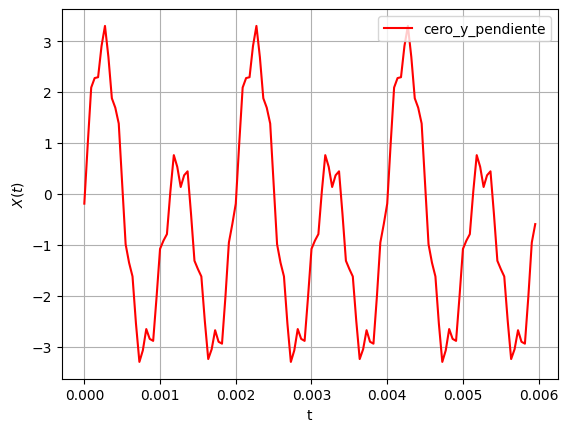

In [8]:
def my_ceropen(x,ymin , ymax ): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv
ymin =float(input("Ingrese el valor minimo de la funcion: "))
ymax = float(input("Ingrese el valor maximo de la funcion: "))
xcp = my_ceropen(x,ymin=ymin,ymax=ymax)

while ymin > ymax:
  print("El valor minimo debe ser menor al valor maximo")
  ymin =float(input("Ingrese el valor minimo de la funcion: "))
  ymax = float(input("Ingrese el valor maximo de la funcion: "))


xcp = my_ceropen(x,ymin=ymin,ymax=ymax)

plt.plot(tv,xcp, 'r', label='cero_y_pendiente')
plt.grid(True)
plt.legend()
plt.xlabel('t')
plt.ylabel('$X(t)$')



In [ ]:
nbits = int(input("Ingrese el numero de bits: "))
while nbits < 1:
  print("El numero de bits debe ser mayor a 1")
  nbits = int(input("Ingrese el numero de bits: "))

num_est = 2**nbits
ve = np.linspace(ymin,ymax,num_est)
print(ve)

Ingrese el numero de bits: 5
[-3.3        -3.08709677 -2.87419355 -2.66129032 -2.4483871  -2.23548387
 -2.02258065 -1.80967742 -1.59677419 -1.38387097 -1.17096774 -0.95806452
 -0.74516129 -0.53225806 -0.31935484 -0.10645161  0.10645161  0.31935484
  0.53225806  0.74516129  0.95806452  1.17096774  1.38387097  1.59677419
  1.80967742  2.02258065  2.23548387  2.4483871   2.66129032  2.87419355
  3.08709677  3.3       ]


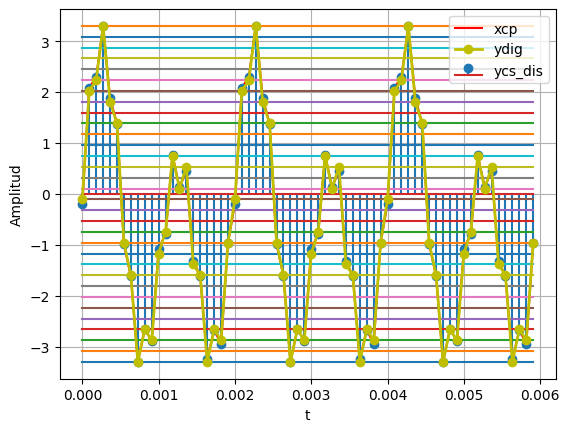

In [ ]:
from scipy.spatial.distance import cdist
def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]
#recorrer vector cero y spam discretizado para cuantizar

for i in range(xcp.shape[0]):
   if i==0: #primera muestra
    yq = my_cuantizador(xcp[i],ve)
   else:
    yq = np.append(yq,my_cuantizador(xcp[i],ve)) #apilar datos cuantizando si i>0

#graficar señales

plt.plot(tv,xcp,c='r', label='xcp')#cs continua

plt.stem(tv,xcp, label='ycs_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

###Pregunta 2
Se dispone de un sistema modelado como una "caja negra" (ver celdas de código). Su tarea es analizar y comprobar mediante simulaciones si el sistema cumple con las propiedades de linealidad e invariancia en el tiempo. En caso de que el sistema sea lineal e invariante con el tiempo, determine su respuesta al impulso y utilice esta respuesta para calcular la salida del sistema ante la siguiente señal:

$x[n] = \sin[100 \pi n ] + \sin[600 \pi n]$

In [ ]:
# cargar sistema
FILEID = "1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O P1_model.zip && rm -rf /tmp/cookies.txt
!unzip -o P1_model.zip
!dir

--2024-12-11 17:08:20--  https://docs.google.com/uc?export=download&confirm=&id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm
Resolving docs.google.com (docs.google.com)... 108.177.98.102, 108.177.98.139, 108.177.98.101, ...
Connecting to docs.google.com (docs.google.com)|108.177.98.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download [following]
--2024-12-11 17:08:20--  https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.195.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 732 [application/octet-stream]
Saving to: ‘P1_model.zip’

P1_model.zip        100%[===================>]     732  --.-KB/s    in 0s

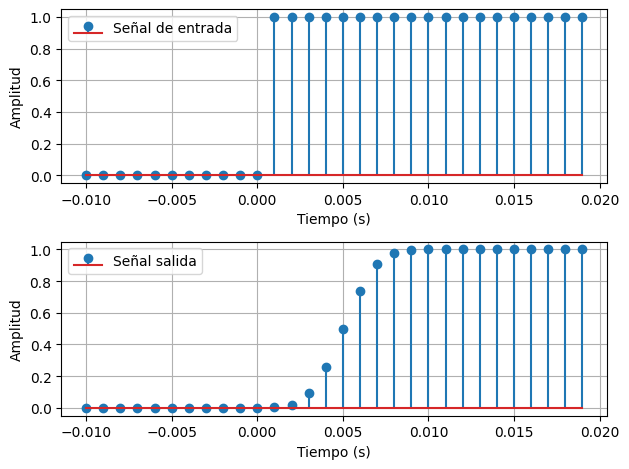

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from P1_model import system_
from scipy.signal import firwin, freqz, lfilter, filtfilt

#sistema pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo
signal_u = np.heaviside(t,1) # función heaviside
y_u = my_system.predict(signal_u)


# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_u, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

### Para saber y el sitema es SLIT Verificamos si cumple la linealidad y la invariancia en el tiempo

Linealidad:  $y(t)=H \{a1x1(t)+a2x2(t)\} = a1H\{x1(t)\}+a2H\{x2(t)\}$

Invariancia con el tiempo:
$y(t) = H\{x(t)\} ; y(t-to) = H\{x(t-to)\}$



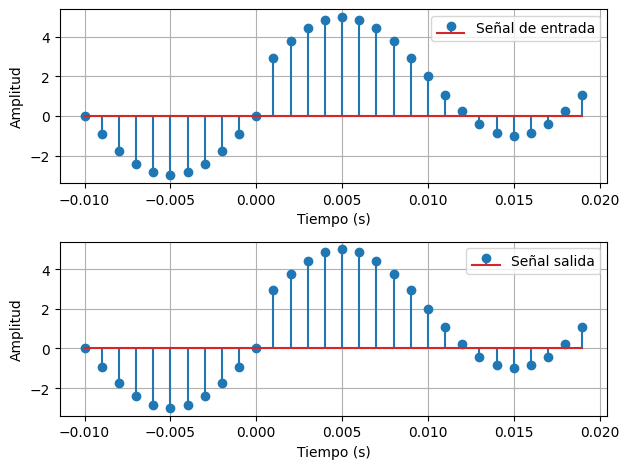

In [ ]:
#Comprobar linelidad

t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo

x1 = 2
x2 = 3

signal_u = np.heaviside(t,1) # función heaviside
y_u = my_system.predict(signal_u)

signal_v = np.sin(100 * np.pi * t) #funcion sen
y_v = my_system.predict(signal_v)

s1 = x1 * y_u  #señal 1 multiplicada por estacalar
s2 = x2 * y_v  #señal 2 multiplicada por estacalar

si = x1 * signal_u + x2 * signal_v #suma de las entradas
y_comb = my_system.predict(si)

sf = s1 + s2

# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, si, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,si, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

Como se muestra en las graficas de la seña de entrada y salida son igulas lo que significa que cumple con la formula: $y(t)=H \{a1x1(t)+a2x2(t)\} = a1H\{x1(t)\}+a2H\{x2(t)\}$

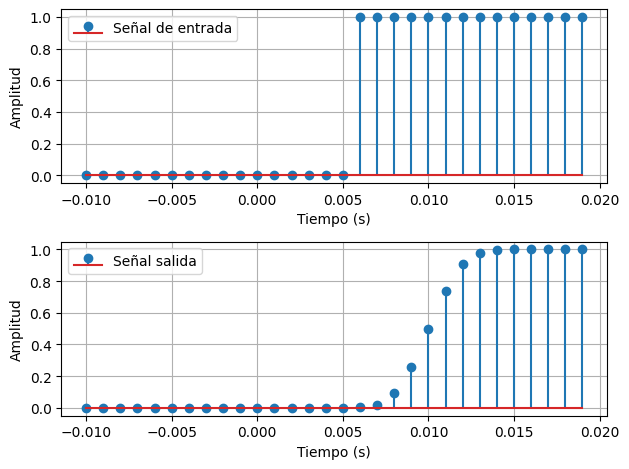

In [ ]:
#Comprobar si es invariancia con el tiempo
to = 0.005
signal_u = np.heaviside(t - to,1) # función heaviside
y_u = my_system.predict(signal_u)


# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_u, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

Como se muestra en la grafica al momento de correro la señal un to en la entrada la salida tambien es corriada el mismo to por lo tanto cumple con la formula: $y(t) = H\{x(t)\} ; y(t-to) = H\{x(t-to)\}$



##Como ya verificamos que la señal es lineal e invariante en el tiempo vamos a determinar su respuesta al impulso

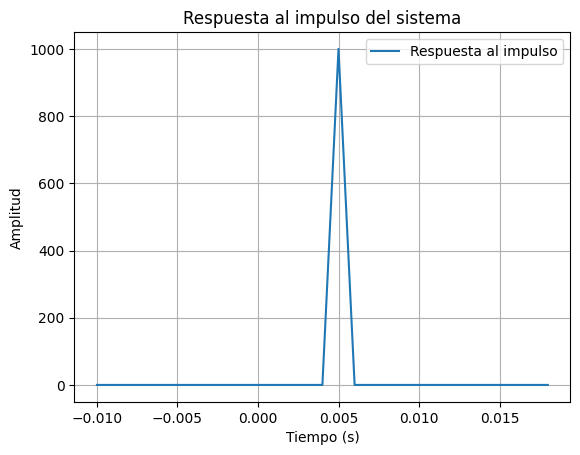

In [ ]:
t_adjusted = t[:-1]
h_n = np.diff(signal_u) * fs  #encontramos la respuesta al impulso derivando la salida del sistema
plt.figure()

# Ajustamos el tamaño de t para que coincida con h_n
t_adjusted = t[:-1]  # Eliminamos el último elemento de t

plt.plot(t_adjusted, h_n, label='Respuesta al impulso'  )
plt.title('Respuesta al impulso del sistema')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

In [ ]:
n = np.round(t*fs) # Muestras
n

array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,  -0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.])

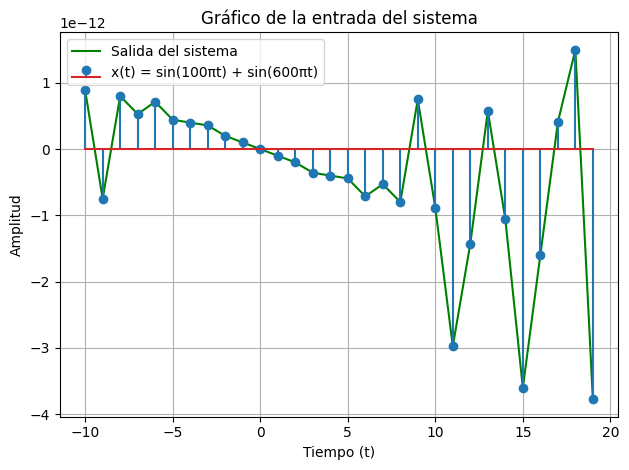

In [ ]:
x_n = np.sin(100 * np.pi * n) + np.sin(600 * np.pi * n)
plt.plot(n, x_n, 'g', label='Salida del sistema')
plt.stem(n, x_n, label="x(t) = sin(100πt) + sin(600πt)")
plt.title("Gráfico de la entrada del sistema")
plt.xlabel("Tiempo (t)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

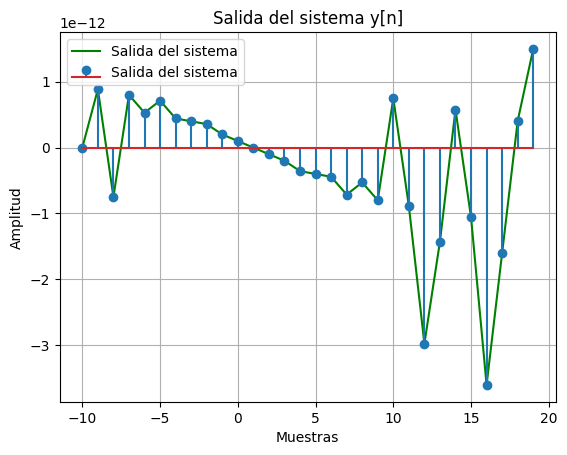

In [ ]:
# Realizar la convolución
y_output = np.convolve(x_n, h_n, mode='same') / fs

# Visualización de la salida
plt.figure()
plt.plot(n, y_output, 'g', label='Salida del sistema')
plt.stem(n, y_output, label='Salida del sistema')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.title('Salida del sistema y[n]')
plt.show()